# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Import API Key
from api_keys import weather_api_key

# Get API url 
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create empty columns 
weather_df = pd.DataFrame()
weather_df['City'] = cities
weather_df['Lat'] = ""
weather_df['Long'] = ""
weather_df['Max Temp'] = ""
weather_df['Humidity'] = ""
weather_df['Cloudiness'] = ""
weather_df['Wind Speed'] = ""
weather_df['Country'] = ""
weather_df['Date'] = ""

#City name formatting 
weather_df['City'] = weather_df['City'].str.title()

weather_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sistranda,,,,,,,,
1,Yellowknife,,,,,,,,
2,Bowen,,,,,,,,
3,Ribeira Grande,,,,,,,,
4,Carauari,,,,,,,,
...,...,...,...,...,...,...,...,...,...
578,Tourlaville,,,,,,,,
579,Nadym,,,,,,,,
580,Mys Shmidta,,,,,,,,
581,Manokwari,,,,,,,,


In [4]:
## API calls 

print('Beginning Data Retrieval')
print('------------------------------------')

# Loop through cities and get weather. Pass if city has no data.
for index, row in weather_df.iterrows():
    
    # Get city name from dataframe 
    city = row['City']
    
    # Generate query url 
    query_url = weather_url + 'q=' + city + '&appid=' + weather_api_key
    
    try:
        # Retrieve data 
        response = requests.get(query_url).json()
        
        # Add response to column 
        print(f"Retrieving results for response {index}: {city}.")
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Long'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        weather_df.loc[index, 'Country'] = response['sys']['country']
        weather_df.loc[index, 'Date'] = response['dt']
    
    # Skip results with no data
    except KeyError:
        print(f'No Results for {city}... skipping')
    
    
print('------------------------------------')
print('Data Retrieval Complete')
    

Beginning Data Retrieval
------------------------------------
Retrieving results for response 0: Sistranda.
Retrieving results for response 1: Yellowknife.
Retrieving results for response 2: Bowen.
Retrieving results for response 3: Ribeira Grande.
Retrieving results for response 4: Carauari.
Retrieving results for response 5: Shymkent.
Retrieving results for response 6: Hermanus.
Retrieving results for response 7: Mayumba.
Retrieving results for response 8: Hilo.
Retrieving results for response 9: Castro.
Retrieving results for response 10: Sayanogorsk.
Retrieving results for response 11: Katsuura.
Retrieving results for response 12: Rikitea.
Retrieving results for response 13: Mataura.
Retrieving results for response 14: Katangli.
Retrieving results for response 15: Illoqqortoormiut.
No Results for Illoqqortoormiut... skipping
Retrieving results for response 16: Puerto Madero.
Retrieving results for response 17: Iqaluit.
Retrieving results for response 18: Saint George.
Retrieving re

Retrieving results for response 162: Mar Del Plata.
Retrieving results for response 163: Port Alfred.
Retrieving results for response 164: Ozinki.
Retrieving results for response 165: Hobyo.
Retrieving results for response 166: Mpwapwa.
Retrieving results for response 167: Colwyn Bay.
Retrieving results for response 168: Lagoa.
Retrieving results for response 169: Fairbanks.
Retrieving results for response 170: Capao Da Canoa.
Retrieving results for response 171: Rapid Valley.
Retrieving results for response 172: Groa.
Retrieving results for response 173: Khash.
Retrieving results for response 174: Savannah Bight.
Retrieving results for response 175: Zhoucheng.
Retrieving results for response 176: Chimbote.
Retrieving results for response 177: Attawapiskat.
No Results for Attawapiskat... skipping
Retrieving results for response 178: Chuy.
Retrieving results for response 179: Cuamba.
Retrieving results for response 180: Kailua.
Retrieving results for response 181: Pevek.
Retrieving resu

Retrieving results for response 330: Korla.
Retrieving results for response 331: Theunissen.
Retrieving results for response 332: Gayny.
Retrieving results for response 333: Mokhsogollokh.
Retrieving results for response 334: Toora-Khem.
Retrieving results for response 335: Dubbo.
Retrieving results for response 336: Lata.
Retrieving results for response 337: Nenjiang.
Retrieving results for response 338: Dong Hoi.
Retrieving results for response 339: Tornio.
Retrieving results for response 340: Padang.
Retrieving results for response 341: Pedernales.
Retrieving results for response 342: Pinega.
Retrieving results for response 343: Inderborskiy.
No Results for Inderborskiy... skipping
Retrieving results for response 344: Haines Junction.
Retrieving results for response 345: Macapa.
Retrieving results for response 346: Sarahan.
Retrieving results for response 347: Lively.
Retrieving results for response 348: Envira.
Retrieving results for response 349: Nakamura.
Retrieving results for r

Retrieving results for response 498: Agirish.
Retrieving results for response 499: Praia Da Vitoria.
Retrieving results for response 500: Ballina.
Retrieving results for response 501: Puerto Penasco.
Retrieving results for response 502: Carahue.
Retrieving results for response 503: Omsukchan.
Retrieving results for response 504: Orlik.
Retrieving results for response 505: Davidson.
Retrieving results for response 506: Huilong.
Retrieving results for response 507: Mozelos.
Retrieving results for response 508: Dunedin.
Retrieving results for response 509: Kralendijk.
Retrieving results for response 510: Cruz Alta.
Retrieving results for response 511: Navsari.
Retrieving results for response 512: Ramasukha.
No Results for Ramasukha... skipping
Retrieving results for response 513: Zaysan.
Retrieving results for response 514: Maceio.
Retrieving results for response 515: Ancud.
Retrieving results for response 516: Suruc.
Retrieving results for response 517: Paita.
Retrieving results for resp

In [5]:
# Export as csv file 
weather_df.to_csv(output_data_file)

# Display dataframe 
weather_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sistranda,63.7256,8.834,264.15,92,20,3.09,NO,1612498986
1,Yellowknife,62.456,-114.353,238.15,75,1,3.09,CA,1612498236
2,Bowen,-20.0167,148.233,299.15,78,90,5.14,AU,1612498987
3,Ribeira Grande,38.5167,-28.7,286.05,68,51,8.52,PT,1612498484
4,Carauari,-4.8828,-66.8958,297.23,96,100,0.51,BR,1612498987
...,...,...,...,...,...,...,...,...,...
578,Tourlaville,49.6383,-1.5664,282.04,100,75,3.6,FR,1612498810
579,Nadym,65.5333,72.5167,240.47,86,5,1.55,RU,1612499064
580,Mys Shmidta,,,,,,,,
581,Manokwari,-0.8667,134.083,301.34,73,100,3.84,ID,1612499064


In [6]:
# Convert data types to numerical and get statistical summary 
numerical_df = weather_df[['Lat', 'Long', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]
numerical_df = numerical_df.apply(pd.to_numeric)
numerical_df.describe().round(2)

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.00,540.00,540.00,540.00,540.00,540.00,5.400000e+02
mean,20.32,17.90,283.15,75.10,53.45,3.56,1.612499e+09
std,33.56,90.26,17.33,18.49,39.42,2.55,2.824100e+02
min,-54.80,-179.17,231.15,18.00,0.00,0.15,1.612498e+09
25%,-6.91,-60.07,273.15,65.75,9.75,1.54,1.612499e+09
50%,24.64,24.28,288.21,79.00,65.00,3.00,1.612499e+09
75%,49.65,98.05,297.04,89.00,91.00,4.90,1.612499e+09
max,78.22,179.32,310.15,100.00,100.00,13.93,1.612499e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100% and drop by index if there are any outliers.

high_humid = numerical_df.loc[numerical_df['Humidity'] > 100].index

if len(high_humid) == 0:
    print('No cities have a humidity > 100%')
if len(high_humid) > 0:
    weather_df = weather_df.drop(high_humid)
    display(weather_df)

No cities have a humidity > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

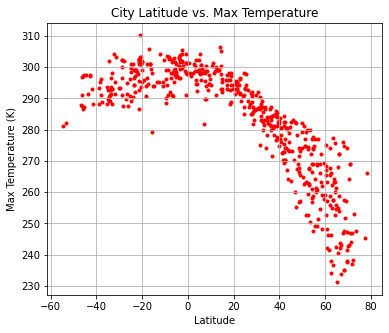

In [8]:
# Get X and Y values
latitude = numerical_df['Lat']
temp = numerical_df['Max Temp']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(latitude, temp, marker='.', color='red')
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(True)

# Save as png 
plt.savefig('../output_data/lat_temp.png', format='png')

plt.show()

## Latitude vs. Humidity Plot

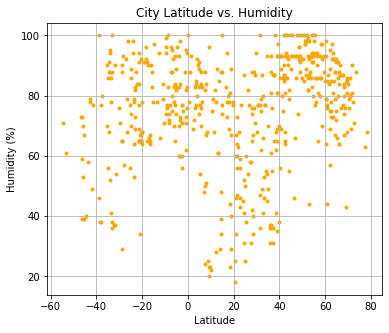

In [9]:
# Get humidity data
humidity = numerical_df['Humidity']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(latitude, humidity, marker='.', color='orange')
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save as png 
plt.savefig('../output_data/lat_humid.png', format='png')

plt.show()

## Latitude vs. Cloudiness Plot

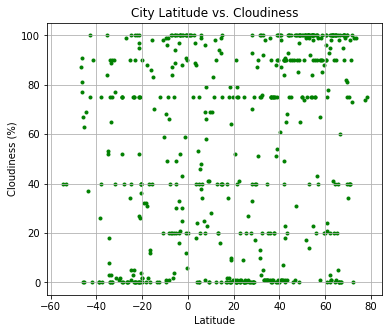

In [10]:
# Get cloudiness data
clouds = numerical_df['Cloudiness']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(latitude, clouds, marker='.', color='green')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save as png 
plt.savefig('../output_data/lat_cloud.png', format='png')

plt.show()

## Latitude vs. Wind Speed Plot

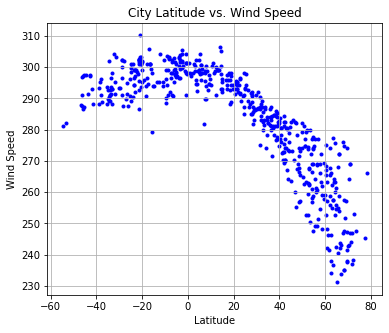

In [11]:
# Get wind speed data
wind = numerical_df['Wind Speed']

# Plot 
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(latitude, temp, marker='.', color='b')
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save as png 
plt.savefig('../output_data/lat_wind.png', format='png')

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

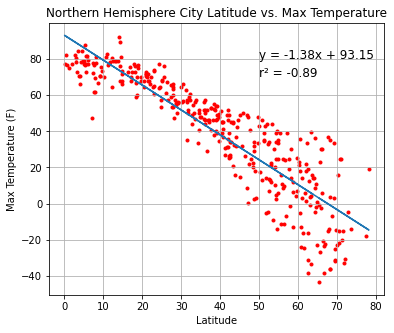

<Figure size 432x288 with 0 Axes>

In [12]:
# Select Northern Hemisphere data
north = numerical_df.loc[numerical_df['Lat'] > 0]

# Get NH Max temp and latitude and convert to farenheit
north_temp = north['Max Temp']
north_temp_f = (north_temp - 273.15) * 9/5 + 32
north_lat = north['Lat']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(north_lat, north_temp_f, marker='.', color='red')
plt.title('Northern Hemisphere City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Regression
r_sq = st.pearsonr(north_lat, north_temp_f)
r_sq = r_sq[0].round(2)
NH_temp_r = f"r² = {r_sq}"

# Linear regression
(slope, intercept, rvalue, pvalue, std) = linregress(north_lat, north_temp_f)
north_temp_eq = 'y = ' + str(slope.round(2)) + 'x + ' + str((intercept.round(2)))
regression = north_lat * slope + intercept

# Add equation and regression line to figure 
plt.plot(north_lat, regression)
plt.annotate(north_temp_eq, (50,80), fontsize=12, color='black')
plt.annotate(NH_temp_r, (50,70), fontsize=12, color='black')
plt.show()

# Save as png 
plt.savefig('../output_data/NH_temp.png', format='png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

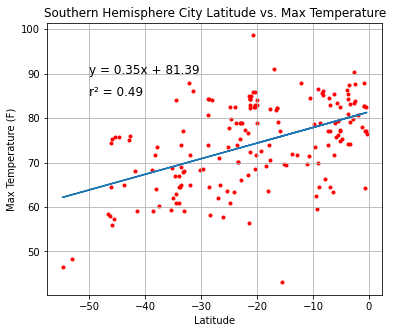

<Figure size 432x288 with 0 Axes>

In [13]:
# Select Northern Hemisphere data
south = numerical_df.loc[numerical_df['Lat'] < 0]

# Get NH Max temp and latitude and convert to F
south_temp = south['Max Temp']
south_temp = (south_temp - 273.15) * 9/5 + 32
south_lat = south['Lat']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(south_lat, south_temp, marker='.', color='red')
plt.title('Southern Hemisphere City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Regression
s_r_sq = st.pearsonr(south_lat, south_temp)
s_r_sq = s_r_sq[0].round(2)
sh_temp_r = f"r² = {s_r_sq}"

# Linear regression
(slope, intercept, rvalue, pvalue, std) = linregress(south_lat, south_temp)
south_temp_eq = 'y = ' + str(slope.round(2)) + 'x + ' + str((intercept.round(2)))
sh_regression = south_lat * slope + intercept

# Add equation and regression line to figure 
plt.plot(south_lat, sh_regression)
plt.annotate(south_temp_eq, (-50,90), fontsize=12, color='black')
plt.annotate(sh_temp_r, (-50,85), fontsize=12, color='black')
plt.show()

# Save as png 
plt.savefig('../output_data/SH_temp.png', format='png')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

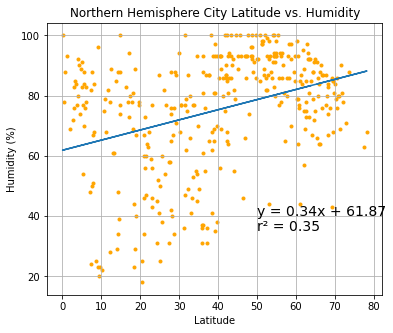

<Figure size 432x288 with 0 Axes>

In [14]:
# Get NH humidity 
nh_humidity = north['Humidity']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(north_lat, nh_humidity, marker='.', color='orange')
plt.title('Northern Hemisphere City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Regression
nh_hum_r = st.pearsonr(north_lat, nh_humidity)
nh_hum_r = nh_hum_r[0].round(2)
nh_hum_r = f"r² = {nh_hum_r}"

# Linear regression
(slope, intercept, rvalue, pvalue, std) = linregress(north_lat, nh_humidity)
nh_hum_eq = 'y = ' + str(slope.round(2)) + 'x + ' + str((intercept.round(2)))
nh_hum_regress = north_lat * slope + intercept

# Add equation and regression line to figure 
plt.plot(north_lat, nh_hum_regress)
plt.annotate(nh_hum_eq, (50,40), fontsize=14, color='black')
plt.annotate(nh_hum_r, (50,35), fontsize=14, color='black')
plt.show()

# Save as png 
plt.savefig('../output_data/NH_humidity.png', format='png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

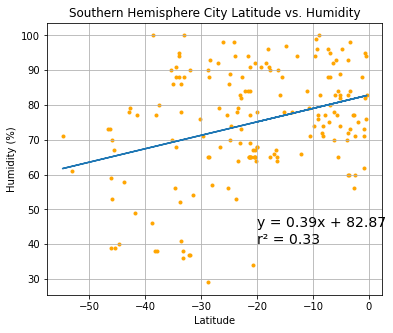

<Figure size 432x288 with 0 Axes>

In [15]:
# Get SH humidity 
sh_humidity = south['Humidity']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(south_lat, sh_humidity, marker='.', color='orange')
plt.title('Southern Hemisphere City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Regression
sh_hum_r = st.pearsonr(south_lat, sh_humidity)
sh_hum_r = sh_hum_r[0].round(2)
sh_hum_r = f"r² = {sh_hum_r}"

# Linear regression
(slope, intercept, rvalue, pvalue, std) = linregress(south_lat, sh_humidity)
sh_hum_eq = 'y = ' + str(slope.round(2)) + 'x + ' + str((intercept.round(2)))
sh_hum_regress = south_lat * slope + intercept

# Add equation and regression line to figure 
plt.plot(south_lat, sh_hum_regress)
plt.annotate(sh_hum_eq, (-20,45), fontsize=14, color='black')
plt.annotate(sh_hum_r, (-20,40), fontsize=14, color='black')
plt.show()

# Save as png 
plt.savefig('../output_data/SH_humidity.png', format='png')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

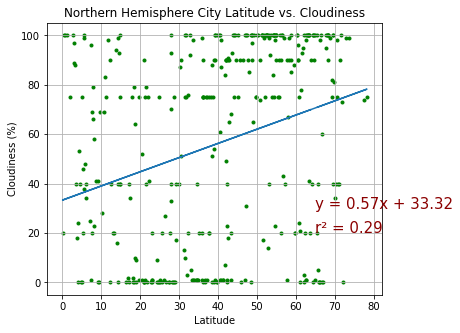

<Figure size 432x288 with 0 Axes>

In [16]:
# Get NH cloudiness 
nh_clouds = north['Cloudiness']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(north_lat, nh_clouds, marker='.', color='green')
plt.title('Northern Hemisphere City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Regression
nh_clouds_r = st.pearsonr(north_lat, nh_clouds)
nh_clouds_r = nh_clouds_r[0].round(2)
nh_clouds_r = f"r² = {nh_clouds_r}"

# Linear regression
(slope, intercept, rvalue, pvalue, std) = linregress(north_lat, nh_clouds)
nh_clouds_eq = 'y = ' + str(slope.round(2)) + 'x + ' + str((intercept.round(2)))
nh_clouds_regress = north_lat * slope + intercept

# Add equation and regression line to figure 
plt.plot(north_lat, nh_clouds_regress)
plt.annotate(nh_clouds_eq, (65,30), fontsize=15, color='darkred')
plt.annotate(nh_clouds_r, (65,20), fontsize=15, color='darkred')
plt.show()

# Save as png 
plt.savefig('../output_data/NH_clouds.png', format='png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

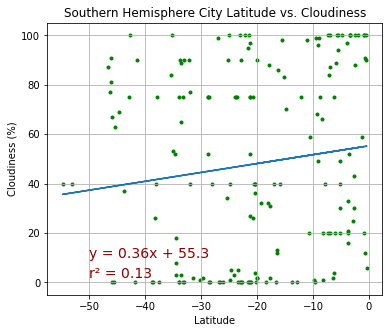

<Figure size 432x288 with 0 Axes>

In [17]:
# Get SH cloudiness 
sh_clouds = south['Cloudiness']

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(south_lat, sh_clouds, marker='.', color='green')
plt.title('Southern Hemisphere City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Regression
sh_clouds_r = st.pearsonr(south_lat, sh_clouds)
sh_clouds_r = sh_clouds_r[0].round(2)
sh_clouds_r = f"r² = {sh_clouds_r}"

# Linear regression
(slope, intercept, rvalue, pvalue, std) = linregress(south_lat, sh_clouds)
sh_clouds_eq = 'y = ' + str(slope.round(2)) + 'x + ' + str((intercept.round(2)))
sh_clouds_regress = south_lat * slope + intercept

# Add equation and regression line to figure 
plt.plot(south_lat, sh_clouds_regress)
plt.annotate(sh_clouds_eq, (-50,10), fontsize=14, color='darkred')
plt.annotate(sh_clouds_r, (-50,2), fontsize=14, color='darkred')
plt.show()

# Save as png 
plt.savefig('../output_data/SH_clouds.png', format='png')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

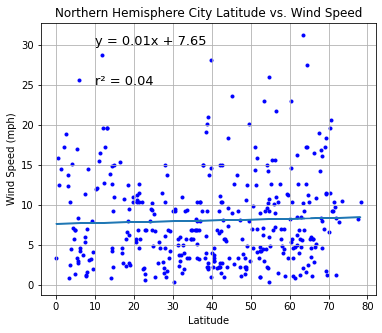

<Figure size 432x288 with 0 Axes>

In [18]:
# Get NH wind speed, convert to mph 
nh_wind = north['Wind Speed']
nh_wind = nh_wind * 2.237

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(north_lat, nh_wind, marker='.', color='b')
plt.title('Northern Hemisphere City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Regression
nh_wind_r = st.pearsonr(north_lat, nh_wind)
nh_wind_r = nh_wind_r[0].round(2)
nh_wind_r = f"r² = {nh_wind_r}"

# Linear regression
(slope, intercept, rvalue, pvalue, std) = linregress(north_lat, nh_wind)
nh_wind_eq = 'y = ' + str(slope.round(2)) + 'x + ' + str((intercept.round(2)))
nh_wind_regress = north_lat * slope + intercept

# Add equation and regression line to figure 
plt.plot(north_lat, nh_wind_regress)
plt.annotate(nh_wind_eq, (10,30), fontsize=13, color='black')
plt.annotate(nh_wind_r, (10,25), fontsize=13, color='black')
plt.show()

# Save as png 
plt.savefig('../output_data/NH_wind.png', format='png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

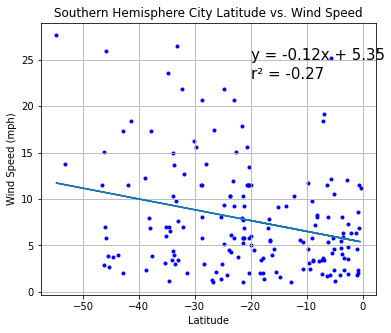

<Figure size 432x288 with 0 Axes>

In [20]:
# Get SH wind speed, convert to mph 
sh_wind = south['Wind Speed']
sh_wind = sh_wind * 2.237

# Plot
fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(south_lat, sh_wind, marker='.', color='b')
plt.title('Southern Hemisphere City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Regression
sh_wind_r = st.pearsonr(south_lat, sh_wind)
sh_wind_r = sh_wind_r[0].round(2)
sh_wind_r = f"r² = {sh_wind_r}"

# Linear regression
(slope, intercept, rvalue, pvalue, std) = linregress(south_lat, sh_wind)
sh_wind_eq = 'y = ' + str(slope.round(2)) + 'x + ' + str((intercept.round(2)))
sh_wind_regress = south_lat * slope + intercept

# Add equation and regression line to figure 
plt.plot(south_lat, sh_wind_regress)
plt.annotate(sh_wind_eq, (-20,25), fontsize=15, color='black')
plt.annotate(sh_wind_r, (-20,23), fontsize=15, color='black')
plt.show()

# Save as png 
plt.savefig('../output_data/SH_wind.png', format='png')

plt.show()